In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
import pandas as pd
import numpy as np

In [3]:
# Specify the folder path where the CSV files are located
path1 = "/content/drive/MyDrive/3014 Project/CSVs/Batch1"
# Create an empty list to store the DataFrames
dataframes1 = []
# Iterate through all files in the folder
for file_name in os.listdir(path1):
    if file_name.endswith(".csv"):
        # Read each CSV file into a DataFrame
        file_path1 = os.path.join(path1, file_name)
        df1= pd.read_csv(file_path1,low_memory=False)
        dataframes1.append(df1)
# Concatenate all DataFrames into a single DataFrame
combine1 = pd.concat(dataframes1, ignore_index=True)
print(combine1.shape)

(197132, 75)


In [ ]:
'''# Specify the folder path where the CSV files are located
path2 = "/content/drive/MyDrive/3014 Project/CSVs/Batch2"
# Create an empty list to store the DataFrames
dataframes2 = []
# Iterate through all files in the folder
for file_name in os.listdir(path2):
    if file_name.endswith(".csv"):
        # Read each CSV file into a DataFrame
        file_path2 = os.path.join(path2, file_name)
        df2= pd.read_csv(file_path2,low_memory=False)
        dataframes2.append(df2)
# Concatenate all DataFrames into a single DataFrame
combine2 = pd.concat(dataframes2, ignore_index=True)
print(combine2.shape)'''

(370995, 83)


In [4]:
# Concatenate all combined dataframes into a single final combined DataFrame
FinalDFList=[]
FinalDFList.append(combine1)
#FinalDFList.append(combine2)
FinalCombo = pd.concat(FinalDFList, ignore_index=True)
FinalCombo = FinalCombo.sort_values(by='bathrooms', na_position='last', ascending=False)
print(FinalCombo.shape)
#print(FinalCombo[['host_location']].head(50))

(197132, 75)


In [33]:
#Making CSV from the final dataset
subset_df = FinalCombo.head(60000)
print(subset_df.shape)

(60000, 75)


In [34]:
subset_df.to_csv("/content/drive/MyDrive/3014 Project/CSVs/FinalAirBnbDataset.csv",index=False)
cols = [
    'id',
    'host_id',
    'property_type',
    'room_type',
    'accommodates',
    'bedrooms',
    'beds',
    'price',
    'number_of_reviews',
    'host_listings_count',
    'availability_30',
    'minimum_nights',
    'bathrooms',
    'has_availability',
    'review_scores_location',
    'review_scores_rating',
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_value',
    'reviews_per_month'
]

data = pd.read_csv('/content/drive/MyDrive/3014 Project/CSVs/FinalAirBnbDataset.csv', usecols=cols, low_memory=False)


In [35]:
data.head()

,id,host_id,host_listings_count,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,...,availability_30,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,155548.0,748161.0,1.0,Entire rental unit,Entire home/apt,3.0,t,1.0,1.0,$200.00,...,0.0,21.0,4.76,4.76,4.81,4.81,4.86,4.33,4.52,0.15
1,50602388.0,60332116.0,1.0,Entire rental unit,Entire home/apt,4.0,t,1.0,1.0,$170.00,...,1.0,2.0,4.50,4.50,4.50,5.00,4.50,4.50,4.50,0.85
2,50608863.0,3854958.0,1.0,Entire rental unit,Entire home/apt,4.0,t,2.0,2.0,$354.00,...,0.0,14.0,5.00,5.00,5.00,5.00,4.93,4.93,4.71,0.70
3,50605312.0,44442865.0,1.0,Entire condo,Entire home/apt,3.0,t,2.0,1.0,$240.00,...,0.0,4.0,5.00,5.00,4.75,4.75,5.00,5.00,5.00,0.19
4,50335507.0,405777047.0,1.0,Entire rental unit,Entire home/apt,4.0,t,2.0,2.0,$317.00,...,0.0,8.0,4.38,4.63,4.25,3.63,4.38,4.50,4.13,0.38


In [36]:
# determine the number of missing entries in each column
for col in data.columns:
    print(col + ', Number of Missing Values:', len(data[col][data[col].isnull()]))

id, Number of Missing Values: 2
host_id, Number of Missing Values: 0
host_listings_count, Number of Missing Values: 6
property_type, Number of Missing Values: 2
room_type, Number of Missing Values: 2
accommodates, Number of Missing Values: 2
bathrooms, Number of Missing Values: 51334
bedrooms, Number of Missing Values: 15433
beds, Number of Missing Values: 721
price, Number of Missing Values: 2
minimum_nights, Number of Missing Values: 2
has_availability, Number of Missing Values: 2
availability_30, Number of Missing Values: 2
number_of_reviews, Number of Missing Values: 2
review_scores_rating, Number of Missing Values: 10916
review_scores_accuracy, Number of Missing Values: 11179
review_scores_cleanliness, Number of Missing Values: 11176
review_scores_checkin, Number of Missing Values: 11187
review_scores_communication, Number of Missing Values: 11177
review_scores_location, Number of Missing Values: 11186
review_scores_value, Number of Missing Values: 11187
reviews_per_month, Number 

In [37]:
'''## Fill NaN values in dataframe using mode of every column

# Calculate the mode for all columns except 'column3'
mode_values = data.drop(columns=['review_scores_rating']).mode().iloc[0]
columns_to_fill = data.columns.difference(['review_scores_rating'])
data[columns_to_fill] = data[columns_to_fill].fillna(mode_values)
print(data)'''
# Convert to numeric with errors set to 'coerce'
data['review_scores_rating'] = pd.to_numeric(data['review_scores_rating'], errors='coerce')
# Convert NaN values (missing values) to 0
data['review_scores_rating'] = data['review_scores_rating'].fillna(0.0).astype(np.float64)
mode_values = data.mode().iloc[0]
columns_to_fill = data.columns
data[columns_to_fill] = data[columns_to_fill].fillna(mode_values)

In [38]:
for col in data.columns:
    print(col + ', Number of Missing Values:', len(data[col][data[col].isnull()]))

id, Number of Missing Values: 0
host_id, Number of Missing Values: 0
host_listings_count, Number of Missing Values: 0
property_type, Number of Missing Values: 0
room_type, Number of Missing Values: 0
accommodates, Number of Missing Values: 0
bathrooms, Number of Missing Values: 0
bedrooms, Number of Missing Values: 0
beds, Number of Missing Values: 0
price, Number of Missing Values: 0
minimum_nights, Number of Missing Values: 0
has_availability, Number of Missing Values: 0
availability_30, Number of Missing Values: 0
number_of_reviews, Number of Missing Values: 0
review_scores_rating, Number of Missing Values: 0
review_scores_accuracy, Number of Missing Values: 0
review_scores_cleanliness, Number of Missing Values: 0
review_scores_checkin, Number of Missing Values: 0
review_scores_communication, Number of Missing Values: 0
review_scores_location, Number of Missing Values: 0
review_scores_value, Number of Missing Values: 0
reviews_per_month, Number of Missing Values: 0


In [39]:
# convert formatting for price if needed
if data['price'].dtypes!=np.float64:
  data['price'] = (data['price'].str.replace(r'[^-+\d.]', '').astype(float))
print(data.dtypes)
print(data[['price']].head(10))

id                             float64
host_id                        float64
host_listings_count             object
property_type                   object
room_type                       object
accommodates                   float64
bathrooms                       object
bedrooms                       float64
beds                           float64
price                          float64
minimum_nights                  object
has_availability                object
availability_30                float64
number_of_reviews              float64
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
reviews_per_month              float64
dtype: object
   price
0  200.0
1  170.0
2  354.0
3  240.0
4  317.0
5  174.0
6  850.0
7  201.0
8  170.0
9  350.0


<ipython-input-39-ba7975fd333e>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data['price'] = (data['price'].str.replace(r'[^-+\d.]', '').astype(float))


In [40]:
# drop any inconsistent values
print('Number of Accommodates 0:', len(data[data['accommodates'] == 0]))
print('Number of Bedrooms 0:', len(data[data['bedrooms'] == 0]))
print('Number of Beds 0:', len(data[data['beds'] == 0]))
print('Number of Listings with Price $0.00:', len(data[data['price'] == 0.00]))

data = data[data['accommodates'] != 0]
data = data[data['bedrooms'] != 0]
data = data[data['beds'] != 0]
data = data[data['price'] != 0.00]

print("\nAfter dropping inconsistent values")
print('Number of Accommodates 0:', len(data[data['accommodates'] == 0]))
print('Number of Bedrooms 0:', len(data[data['bedrooms'] == 0]))
print('Number of Beds 0:', len(data[data['beds'] == 0]))
print('Number of Listings with Price $0.00:', len(data[data['price'] == 0.00]))


Number of Accommodates 0: 4
Number of Bedrooms 0: 1
Number of Beds 0: 1
Number of Listings with Price $0.00: 6

After dropping inconsistent values
Number of Accommodates 0: 0
Number of Bedrooms 0: 0
Number of Beds 0: 0
Number of Listings with Price $0.00: 0


In [41]:
data.head()

,id,host_id,host_listings_count,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,...,availability_30,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,155548.0,748161.0,1.0,Entire rental unit,Entire home/apt,3.0,t,1.0,1.0,200.0,...,0.0,21.0,4.76,4.76,4.81,4.81,4.86,4.33,4.52,0.15
1,50602388.0,60332116.0,1.0,Entire rental unit,Entire home/apt,4.0,t,1.0,1.0,170.0,...,1.0,2.0,4.50,4.50,4.50,5.00,4.50,4.50,4.50,0.85
2,50608863.0,3854958.0,1.0,Entire rental unit,Entire home/apt,4.0,t,2.0,2.0,354.0,...,0.0,14.0,5.00,5.00,5.00,5.00,4.93,4.93,4.71,0.70
3,50605312.0,44442865.0,1.0,Entire condo,Entire home/apt,3.0,t,2.0,1.0,240.0,...,0.0,4.0,5.00,5.00,4.75,4.75,5.00,5.00,5.00,0.19
4,50335507.0,405777047.0,1.0,Entire rental unit,Entire home/apt,4.0,t,2.0,2.0,317.0,...,0.0,8.0,4.38,4.63,4.25,3.63,4.38,4.50,4.13,0.38


In [42]:
# explore distribution of accommodates
value_counts = data['accommodates'].value_counts()

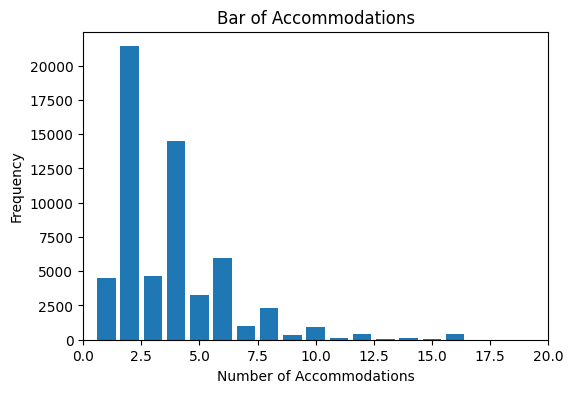

In [43]:
# visualize distribution of accommodates
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Number of Accommodations')
plt.ylabel('Frequency')
plt.title('Bar of Accommodations')
plt.xlim(0, 20)
plt.show()


**As we can see that most of the accomodates are of 1-4 people so now we will go for bed plotting**



In [44]:
# explore distribution of beds
value_counts1 = data['beds'].value_counts()

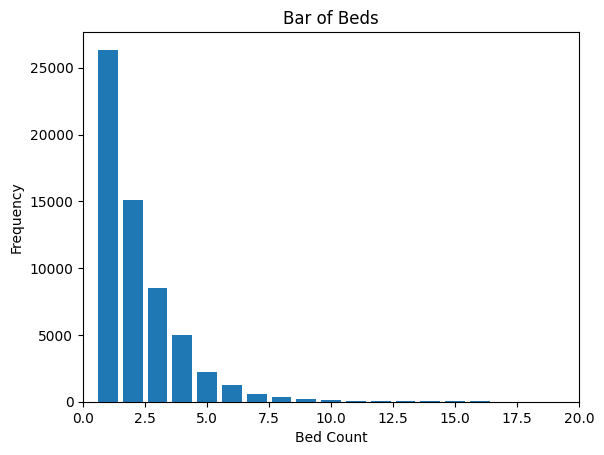

In [45]:
# visualize distribution of beds
import matplotlib.pyplot as plt
plt.bar(value_counts1.index, value_counts1.values)
plt.xlabel('Bed Count')
plt.ylabel('Frequency')
plt.title('Bar of Beds')
plt.xlim(0, 20)
plt.show()

**Here we can see that mostly single bed rooms are getting purchased**

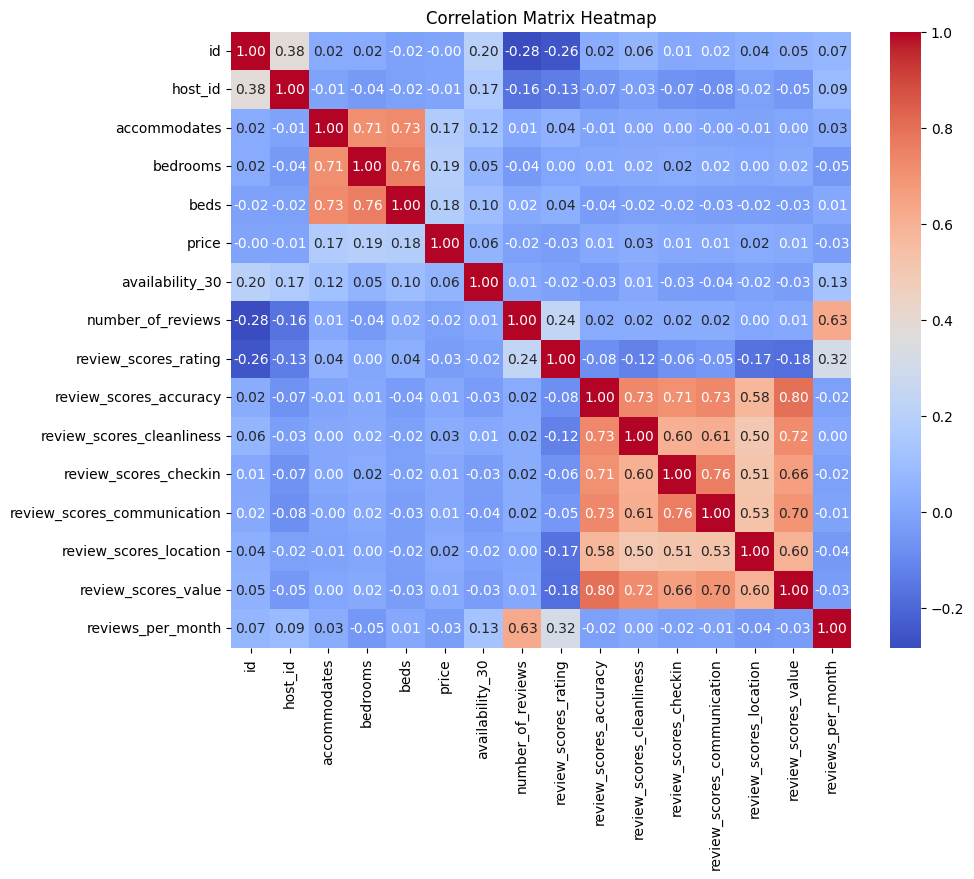

Numeric Columns:
Index(['id', 'host_id', 'accommodates', 'bedrooms', 'beds', 'price',
       'availability_30', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'reviews_per_month'],
      dtype='object')
Categorical Columns:
{'bathrooms', 'property_type', 'host_listings_count', 'room_type', 'minimum_nights', 'has_availability'}


In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Compute the Correlation Matrix for Numeric Columns
correlation_matrix = data[numeric_columns].corr()
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()
categorical_columns = set(data.columns) - set(numeric_columns)

print("Numeric Columns:")
print(numeric_columns)

print("Categorical Columns:")
print(categorical_columns)

In [47]:
#OH Encoding
import pandas as pd
df_encoded = pd.get_dummies(data, columns=categorical_columns, prefix='encoded')
print(df_encoded)

<ipython-input-47-9918247177d4>:3: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_encoded = pd.get_dummies(data, columns=categorical_columns, prefix='encoded')


                 id      host_id  accommodates  bedrooms  beds  price  \
0      1.555480e+05     748161.0           3.0       1.0   1.0  200.0   
1      5.060239e+07   60332116.0           4.0       1.0   1.0  170.0   
2      5.060886e+07    3854958.0           4.0       2.0   2.0  354.0   
3      5.060531e+07   44442865.0           3.0       2.0   1.0  240.0   
4      5.033551e+07  405777047.0           4.0       2.0   2.0  317.0   
...             ...          ...           ...       ...   ...    ...   
59997  8.310973e+17  119050270.0           3.0       1.0   1.0  122.0   
59998  8.021704e+17  297860058.0           1.0       1.0   1.0   68.0   
59999  5.841216e+17     814298.0           2.0       1.0   1.0  110.0   
60000  1.317320e+07      38997.0           2.0       1.0   1.0  136.0   
60001  8.755185e+17     799496.0           4.0       1.0   2.0  298.0   

       availability_30  number_of_reviews  review_scores_rating  \
0                  0.0               21.0               

In [48]:
#Handling the Outliers using IQR
# Calculate the IQR for each column
Q1 = df_encoded.quantile(0.25)
Q3 = df_encoded.quantile(0.75)
IQR = Q3 - Q1

# Define the threshold for outliers
threshold = 1.5

# Identify rows with outliers
outliers = (df_encoded < (Q1 - threshold * IQR)) | (df_encoded > (Q3 + threshold * IQR))

# Remove rows with outliers
df_encoded = df_encoded[~outliers.any(axis=1)]

In [53]:
#seperating Features and target variables
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
X = df_encoded.loc[:, df_encoded.columns != 'price']
Y = df_encoded['price']
#splitting in train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.2, random_state=42)
# Print the shapes of the train and test sets
print("\nTrain data shape:", X_train.shape, y_train.shape)
print("\nTest data shape:", X_test.shape, y_test.shape)


Train data shape: (1280, 449) (1280,)

Test data shape: (320, 449) (320,)


In [54]:
# Initialize and fit the preprocessing scaler on the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
# Apply the same transformation to the test data
X_test_scaled = scaler.transform(X_test)

In [55]:
from sklearn.linear_model import LinearRegression
# Initialize and train the model on the scaled training data
print("\nLR")
LR_model = LinearRegression()
LR_model.fit(X_train_scaled, y_train)
y_train_pred =LR_model.predict(X_train_scaled)
y_test_pred =LR_model.predict(X_test_scaled)
# Calculate Mean Squared Error (MSE) for train and test sets
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print("\nTrain MSE:", train_mse)
print("\nTest MSE:", test_mse)
# Calculate R-squared for train and test sets
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
print("\nTrain R-squared:", train_r2)
print("\nTest R-squared:", test_r2)


LR

Train MSE: 4461.256198613705

Test MSE: 4360.518016033626

Train R-squared: 0.18179032886896962

Test R-squared: 0.19583793844836117


In [56]:
from sklearn.linear_model import ElasticNet
# Initialize and train the model on the scaled training data
print("\nElasticNET")
En_model = ElasticNet(alpha=0.1, l1_ratio=0.5)
En_model.fit(X_train_scaled, y_train)
y_train_pred =En_model.predict(X_train_scaled)
y_test_pred =En_model.predict(X_test_scaled)
# Calculate Mean Squared Error (MSE) for train and test sets
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print("\nTrain MSE:", train_mse)
print("\nTest MSE:", test_mse)
# Calculate R-squared for train and test sets
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
print("\nTrain R-squared:", train_r2)
print("\nTest R-squared:", test_r2)


ElasticNET

Train MSE: 4461.6056045527785

Test MSE: 4396.425224204636

Train R-squared: 0.18172624662267556

Test R-squared: 0.18921596958108688


In [ ]:
'''# visualize distribution of review scores ratings
plt.hist(data['review_scores_rating'][~data['review_scores_rating'].isnull()])
plt.title("Histogram of Review Scores Ratings")
plt.xlabel("Review Score")
plt.ylabel("Frequency")
plt.show()'''

**Here we can see that the most of the ratings are 4-5 and it is left skewed but we will handle it don't worry at all!**

In [ ]:
'''data['review_scores_rating'] = data['review_scores_rating'].astype(str)
print(data[['review_scores_rating']].dtypes)'''

In [ ]:
'''# turn NaN scores with 0 reviews into 'No Reviews'
# Convert the 'column_name' to boolean type
data['review_scores_rating'] = data['review_scores_rating'].map(lambda x: 't' if x == 'True' else (False if x == 'False' else None))
idx_vals = data['review_scores_rating'][data['number_of_reviews'] == 0].index.values.tolist()
data.loc[idx_vals, ('review_scores_rating')] = data['review_scores_rating'][data['number_of_reviews'] == 0].replace('NaN', 'No Reviews')

# remove inconsistent NaN values
data = data[~data['review_scores_rating'].isnull()]'''

In [ ]:
'''# convert review_scores_rating into buckets
def convert_scores_buckets(val):
    if val == 'No Reviews':
        return 'No Reviews'
    elif val >= 4 and val <=5:
        return '4-5'
    elif val >= 3 and val <4:
        return '3-3.9'
    elif val >= 2 and val < 3:
        return '2-2.9'
    elif val >= 1 and val < 2:
        return '1-1.9'
    elif val < 1:
        return '0-0.9'

data['review_scores_rating'] = data['review_scores_rating'].apply(convert_scores_buckets)
print(data[['review_scores_rating']])
print('Unique Values in the Column:', np.unique(data['review_scores_rating']))'''

In [ ]:
%%shell
jupyter nbconvert --to html ///content/AirBnbFinalDemo.ipynb